- https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()
print(f.shape)
plt.figure(figsize=(6,2));plt.plot(f);plt.show()

Using TensorFlow backend.


(201,)


<Figure size 600x200 with 1 Axes>

- aaa

In [2]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen]) # x (25フレーム切り取ってくる)
        target.append(low_data[i+1:i + maxlen+1]) # y (xの1フレーム先)

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), maxlen, 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)
print(g.shape, h.shape)

(176, 25, 1) (176, 25, 1)


In [3]:
length_of_sequence = g.shape[1] # 25
in_out_neurons = 1
n_hidden = 8

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=True))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam()
model.compile(loss="mean_squared_error", optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 25, 8)             320       
_________________________________________________________________
dense_1 (Dense)              (None, 25, 1)             9         
_________________________________________________________________
activation_1 (Activation)    (None, 25, 1)             0         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [4]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=100)
model.fit(g, h,
          batch_size=300,
          epochs=1000,
          shuffle=True,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/1000
158/158 [==============================] - 1s 4ms/step - loss: 1.0606 - val_loss: 1.5411
Epoch 2/1000
158/158 [==============================] - 0s 157us/step - loss: 1.0500 - val_loss: 1.5354
Epoch 3/1000
158/158 [==============================] - 0s 123us/step - loss: 1.0397 - val_loss: 1.5302
Epoch 4/1000
158/158 [==============================] - 0s 141us/step - loss: 1.0305 - val_loss: 1.5243
Epoch 5/1000
158/158 [==============================] - 0s 130us/step - loss: 1.0205 - val_loss: 1.5184
Epoch 6/1000
158/158 [==============================] - 0s 153us/step - loss: 1.0107 - val_loss: 1.5123
Epoch 7/1000
158/158 [==============================] - 0s 140us/step - loss: 1.0011 - val_loss: 1.5061
Epoch 8/1000
158/158 [==============================] - 0s 139us/step - loss: 0.9917 - val_loss: 1.4998
Epoch 9/1000
158/158 [==============================] - 0s 130us/step - loss: 0.9824 - val_loss: 1.4932
Epoch 10/1000
158/158

Epoch 79/1000
158/158 [==============================] - 0s 133us/step - loss: 0.5573 - val_loss: 1.0072
Epoch 80/1000
158/158 [==============================] - 0s 143us/step - loss: 0.5527 - val_loss: 1.0006
Epoch 81/1000
158/158 [==============================] - 0s 153us/step - loss: 0.5482 - val_loss: 0.9940
Epoch 82/1000
158/158 [==============================] - 0s 142us/step - loss: 0.5437 - val_loss: 0.9874
Epoch 83/1000
158/158 [==============================] - 0s 169us/step - loss: 0.5392 - val_loss: 0.9809
Epoch 84/1000
158/158 [==============================] - 0s 208us/step - loss: 0.5347 - val_loss: 0.9742
Epoch 85/1000
158/158 [==============================] - 0s 164us/step - loss: 0.5302 - val_loss: 0.9677
Epoch 86/1000
158/158 [==============================] - 0s 142us/step - loss: 0.5258 - val_loss: 0.9611
Epoch 87/1000
158/158 [==============================] - 0s 135us/step - loss: 0.5214 - val_loss: 0.9545
Epoch 88/1000
158/158 [==============================] 

Epoch 157/1000
158/158 [==============================] - 0s 126us/step - loss: 0.2669 - val_loss: 0.4704
Epoch 158/1000
158/158 [==============================] - 0s 147us/step - loss: 0.2639 - val_loss: 0.4637
Epoch 159/1000
158/158 [==============================] - 0s 147us/step - loss: 0.2610 - val_loss: 0.4570
Epoch 160/1000
158/158 [==============================] - 0s 212us/step - loss: 0.2581 - val_loss: 0.4504
Epoch 161/1000
158/158 [==============================] - 0s 187us/step - loss: 0.2552 - val_loss: 0.4438
Epoch 162/1000
158/158 [==============================] - 0s 140us/step - loss: 0.2523 - val_loss: 0.4372
Epoch 163/1000
158/158 [==============================] - 0s 153us/step - loss: 0.2495 - val_loss: 0.4308
Epoch 164/1000
158/158 [==============================] - 0s 137us/step - loss: 0.2467 - val_loss: 0.4244
Epoch 165/1000
158/158 [==============================] - 0s 146us/step - loss: 0.2439 - val_loss: 0.4180
Epoch 166/1000
158/158 [======================

Epoch 235/1000
158/158 [==============================] - 0s 185us/step - loss: 0.1104 - val_loss: 0.1471
Epoch 236/1000
158/158 [==============================] - 0s 133us/step - loss: 0.1094 - val_loss: 0.1455
Epoch 237/1000
158/158 [==============================] - 0s 144us/step - loss: 0.1083 - val_loss: 0.1439
Epoch 238/1000
158/158 [==============================] - 0s 141us/step - loss: 0.1072 - val_loss: 0.1423
Epoch 239/1000
158/158 [==============================] - 0s 160us/step - loss: 0.1062 - val_loss: 0.1408
Epoch 240/1000
158/158 [==============================] - 0s 142us/step - loss: 0.1052 - val_loss: 0.1393
Epoch 241/1000
158/158 [==============================] - 0s 139us/step - loss: 0.1042 - val_loss: 0.1378
Epoch 242/1000
158/158 [==============================] - 0s 133us/step - loss: 0.1032 - val_loss: 0.1364
Epoch 243/1000
158/158 [==============================] - 0s 127us/step - loss: 0.1022 - val_loss: 0.1350
Epoch 244/1000
158/158 [======================

Epoch 313/1000
158/158 [==============================] - 0s 180us/step - loss: 0.0562 - val_loss: 0.0854
Epoch 314/1000
158/158 [==============================] - 0s 156us/step - loss: 0.0558 - val_loss: 0.0849
Epoch 315/1000
158/158 [==============================] - 0s 132us/step - loss: 0.0554 - val_loss: 0.0845
Epoch 316/1000
158/158 [==============================] - 0s 156us/step - loss: 0.0550 - val_loss: 0.0840
Epoch 317/1000
158/158 [==============================] - 0s 178us/step - loss: 0.0547 - val_loss: 0.0836
Epoch 318/1000
158/158 [==============================] - 0s 154us/step - loss: 0.0543 - val_loss: 0.0832
Epoch 319/1000
158/158 [==============================] - 0s 251us/step - loss: 0.0539 - val_loss: 0.0827
Epoch 320/1000
158/158 [==============================] - 0s 166us/step - loss: 0.0536 - val_loss: 0.0823
Epoch 321/1000
158/158 [==============================] - 0s 144us/step - loss: 0.0532 - val_loss: 0.0819
Epoch 322/1000
158/158 [======================

Epoch 391/1000
158/158 [==============================] - 0s 146us/step - loss: 0.0387 - val_loss: 0.0599
Epoch 392/1000
158/158 [==============================] - 0s 149us/step - loss: 0.0386 - val_loss: 0.0597
Epoch 393/1000
158/158 [==============================] - 0s 138us/step - loss: 0.0385 - val_loss: 0.0595
Epoch 394/1000
158/158 [==============================] - 0s 152us/step - loss: 0.0384 - val_loss: 0.0593
Epoch 395/1000
158/158 [==============================] - 0s 222us/step - loss: 0.0382 - val_loss: 0.0591
Epoch 396/1000
158/158 [==============================] - 0s 176us/step - loss: 0.0381 - val_loss: 0.0589
Epoch 397/1000
158/158 [==============================] - 0s 127us/step - loss: 0.0380 - val_loss: 0.0587
Epoch 398/1000
158/158 [==============================] - 0s 161us/step - loss: 0.0379 - val_loss: 0.0586
Epoch 399/1000
158/158 [==============================] - 0s 151us/step - loss: 0.0378 - val_loss: 0.0584
Epoch 400/1000
158/158 [======================

Epoch 469/1000
158/158 [==============================] - 0s 163us/step - loss: 0.0315 - val_loss: 0.0500
Epoch 470/1000
158/158 [==============================] - 0s 161us/step - loss: 0.0314 - val_loss: 0.0500
Epoch 471/1000
158/158 [==============================] - 0s 122us/step - loss: 0.0313 - val_loss: 0.0499
Epoch 472/1000
158/158 [==============================] - 0s 130us/step - loss: 0.0313 - val_loss: 0.0498
Epoch 473/1000
158/158 [==============================] - 0s 168us/step - loss: 0.0312 - val_loss: 0.0497
Epoch 474/1000
158/158 [==============================] - 0s 159us/step - loss: 0.0311 - val_loss: 0.0497
Epoch 475/1000
158/158 [==============================] - 0s 116us/step - loss: 0.0311 - val_loss: 0.0496
Epoch 476/1000
158/158 [==============================] - 0s 171us/step - loss: 0.0310 - val_loss: 0.0495
Epoch 477/1000
158/158 [==============================] - 0s 136us/step - loss: 0.0309 - val_loss: 0.0495
Epoch 478/1000
158/158 [======================

Epoch 547/1000
158/158 [==============================] - 0s 143us/step - loss: 0.0267 - val_loss: 0.0455
Epoch 548/1000
158/158 [==============================] - 0s 135us/step - loss: 0.0266 - val_loss: 0.0454
Epoch 549/1000
158/158 [==============================] - 0s 164us/step - loss: 0.0266 - val_loss: 0.0454
Epoch 550/1000
158/158 [==============================] - 0s 180us/step - loss: 0.0265 - val_loss: 0.0453
Epoch 551/1000
158/158 [==============================] - 0s 190us/step - loss: 0.0265 - val_loss: 0.0453
Epoch 552/1000
158/158 [==============================] - 0s 145us/step - loss: 0.0264 - val_loss: 0.0452
Epoch 553/1000
158/158 [==============================] - 0s 182us/step - loss: 0.0264 - val_loss: 0.0452
Epoch 554/1000
158/158 [==============================] - 0s 132us/step - loss: 0.0263 - val_loss: 0.0451
Epoch 555/1000
158/158 [==============================] - 0s 140us/step - loss: 0.0263 - val_loss: 0.0451
Epoch 556/1000
158/158 [======================

Epoch 625/1000
158/158 [==============================] - 0s 163us/step - loss: 0.0230 - val_loss: 0.0419
Epoch 626/1000
158/158 [==============================] - 0s 142us/step - loss: 0.0229 - val_loss: 0.0419
Epoch 627/1000
158/158 [==============================] - 0s 154us/step - loss: 0.0229 - val_loss: 0.0418
Epoch 628/1000
158/158 [==============================] - 0s 145us/step - loss: 0.0229 - val_loss: 0.0418
Epoch 629/1000
158/158 [==============================] - 0s 173us/step - loss: 0.0228 - val_loss: 0.0417
Epoch 630/1000
158/158 [==============================] - 0s 144us/step - loss: 0.0228 - val_loss: 0.0417
Epoch 631/1000
158/158 [==============================] - 0s 204us/step - loss: 0.0227 - val_loss: 0.0417
Epoch 632/1000
158/158 [==============================] - 0s 141us/step - loss: 0.0227 - val_loss: 0.0416
Epoch 633/1000
158/158 [==============================] - 0s 184us/step - loss: 0.0227 - val_loss: 0.0416
Epoch 634/1000
158/158 [======================

Epoch 703/1000
158/158 [==============================] - 0s 150us/step - loss: 0.0201 - val_loss: 0.0388
Epoch 704/1000
158/158 [==============================] - 0s 136us/step - loss: 0.0201 - val_loss: 0.0388
Epoch 705/1000
158/158 [==============================] - 0s 196us/step - loss: 0.0201 - val_loss: 0.0387
Epoch 706/1000
158/158 [==============================] - 0s 147us/step - loss: 0.0200 - val_loss: 0.0387
Epoch 707/1000
158/158 [==============================] - 0s 150us/step - loss: 0.0200 - val_loss: 0.0387
Epoch 708/1000
158/158 [==============================] - 0s 150us/step - loss: 0.0200 - val_loss: 0.0386
Epoch 709/1000
158/158 [==============================] - 0s 168us/step - loss: 0.0199 - val_loss: 0.0386
Epoch 710/1000
158/158 [==============================] - 0s 136us/step - loss: 0.0199 - val_loss: 0.0385
Epoch 711/1000
158/158 [==============================] - 0s 197us/step - loss: 0.0199 - val_loss: 0.0385
Epoch 712/1000
158/158 [======================

Epoch 781/1000
158/158 [==============================] - 0s 157us/step - loss: 0.0180 - val_loss: 0.0360
Epoch 782/1000
158/158 [==============================] - 0s 148us/step - loss: 0.0180 - val_loss: 0.0360
Epoch 783/1000
158/158 [==============================] - 0s 196us/step - loss: 0.0180 - val_loss: 0.0359
Epoch 784/1000
158/158 [==============================] - 0s 153us/step - loss: 0.0179 - val_loss: 0.0359
Epoch 785/1000
158/158 [==============================] - 0s 141us/step - loss: 0.0179 - val_loss: 0.0359
Epoch 786/1000
158/158 [==============================] - 0s 131us/step - loss: 0.0179 - val_loss: 0.0358
Epoch 787/1000
158/158 [==============================] - 0s 128us/step - loss: 0.0179 - val_loss: 0.0358
Epoch 788/1000
158/158 [==============================] - 0s 190us/step - loss: 0.0179 - val_loss: 0.0358
Epoch 789/1000
158/158 [==============================] - 0s 237us/step - loss: 0.0178 - val_loss: 0.0357
Epoch 790/1000
158/158 [======================

Epoch 859/1000
158/158 [==============================] - 0s 164us/step - loss: 0.0164 - val_loss: 0.0334
Epoch 860/1000
158/158 [==============================] - 0s 159us/step - loss: 0.0164 - val_loss: 0.0333
Epoch 861/1000
158/158 [==============================] - 0s 188us/step - loss: 0.0163 - val_loss: 0.0333
Epoch 862/1000
158/158 [==============================] - 0s 139us/step - loss: 0.0163 - val_loss: 0.0333
Epoch 863/1000
158/158 [==============================] - 0s 152us/step - loss: 0.0163 - val_loss: 0.0332
Epoch 864/1000
158/158 [==============================] - 0s 123us/step - loss: 0.0163 - val_loss: 0.0332
Epoch 865/1000
158/158 [==============================] - 0s 196us/step - loss: 0.0163 - val_loss: 0.0332
Epoch 866/1000
158/158 [==============================] - 0s 193us/step - loss: 0.0163 - val_loss: 0.0331
Epoch 867/1000
158/158 [==============================] - 0s 143us/step - loss: 0.0162 - val_loss: 0.0331
Epoch 868/1000
158/158 [======================

Epoch 937/1000
158/158 [==============================] - 0s 142us/step - loss: 0.0150 - val_loss: 0.0308
Epoch 938/1000
158/158 [==============================] - 0s 192us/step - loss: 0.0150 - val_loss: 0.0308
Epoch 939/1000
158/158 [==============================] - 0s 187us/step - loss: 0.0150 - val_loss: 0.0308
Epoch 940/1000
158/158 [==============================] - 0s 143us/step - loss: 0.0150 - val_loss: 0.0307
Epoch 941/1000
158/158 [==============================] - 0s 144us/step - loss: 0.0149 - val_loss: 0.0307
Epoch 942/1000
158/158 [==============================] - 0s 141us/step - loss: 0.0149 - val_loss: 0.0307
Epoch 943/1000
158/158 [==============================] - 0s 145us/step - loss: 0.0149 - val_loss: 0.0306
Epoch 944/1000
158/158 [==============================] - 0s 156us/step - loss: 0.0149 - val_loss: 0.0306
Epoch 945/1000
158/158 [==============================] - 0s 167us/step - loss: 0.0149 - val_loss: 0.0306
Epoch 946/1000
158/158 [======================

(176, 25, 1) (176, 25, 1)
(176, 25, 1) (176, 1)


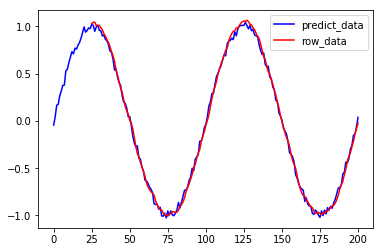

In [5]:
# 予測
predicted = model.predict(g) # (176, 25, 1) -> (176, 25, 1) # t+1のデータを予測したものが176個。
print(g.shape, predicted.shape)

predicted = predicted[:,-1,0].reshape(-1,1)
print(g.shape, predicted.shape)

plt.figure()
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.legend()
plt.show()

### 悪化した()

(1, 25)


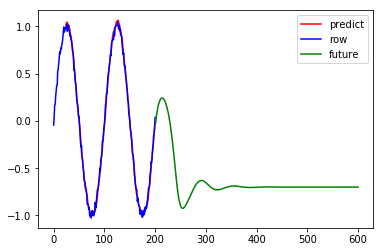

In [6]:

future_test = g[175].T # 1x25

# 1つの学習データの時間の長さ -> 25
time_length = future_test.shape[1] # 25
# 未来の予測データを保存していく変数
future_result = np.empty((0))

print(future_test.shape) # (1, 25)

# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)[:,-1,0].reshape(-1,1) # 一番最後のフレームだけ使う

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict")
plt.plot(range(0, len(f)), f, color="b", label="row")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future")
plt.legend()
plt.show()